#Markitdown
Made by: Wilfredo Aaron Sosa Ramos (AI Lab Manager at RealityAI Labs)

Reference: https://github.com/microsoft/markitdown

In [1]:
!pip install -q markitdown openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 9.4 MB/s eta 0:00:00


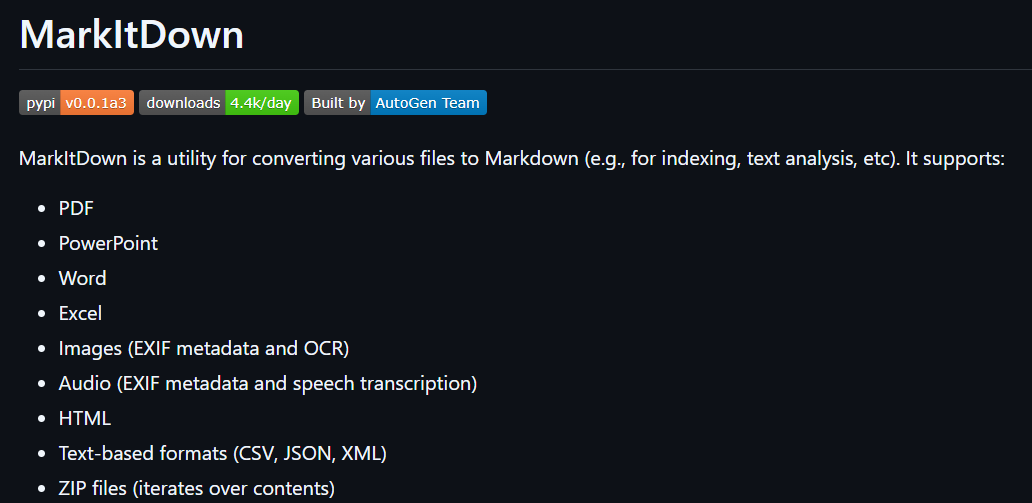

#PDF file

In [2]:
from markitdown import MarkItDown

md = MarkItDown()
result = md.convert("/content/1_2_NIPS-2017-attention-is-all-you-need-Paper.pdf")
print(result.text_content)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Attention Is All You Need

Ashish Vaswani∗
Google Brain
avaswani@google.com

Noam Shazeer∗
Google Brain
noam@google.com

Niki Parmar∗
Google Research
nikip@google.com

Jakob Uszkoreit∗
Google Research
usz@google.com

Llion Jones∗
Google Research
llion@google.com

Aidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.edu

Łukasz Kaiser∗
Google Brain
lukaszkaiser@google.com

Illia Polosukhin∗ ‡
illia.polosukhin@gmail.com

Abstract

The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring signiﬁcantly
less time to train.

#Images:

In [4]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from markitdown import MarkItDown
from openai import OpenAI

client = OpenAI()
md = MarkItDown(llm_client=client, llm_model="gpt-4o-mini")
result = md.convert("/content/transformers.png")
print(result.text_content)


# Description:
This diagram illustrates the architectural differences between two prominent transformer models: BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer).

On the left, the BERT model is depicted as an encoder. It processes input data using a stack of identical layers (noted as Nx), which include operations like Multi-Head Attention and Feed Forward networks, followed by normalization steps (labeled "Add & Norm"). BERT uses positional encoding to maintain the order of input embeddings, enabling it to capture context effectively through its bidirectional attention mechanism.

On the right, the GPT model is represented as a decoder. It employs a similar stack structure, but includes masked Multi-Head Attention, ensuring that the model generates text by only considering previous tokens, thus maintaining autoregressive properties. Both models utilize embeddings and positional encoding but serve different purposes: BERT exce

#Batch Processing Multiple Files

In [6]:
from markitdown import MarkItDown
from openai import OpenAI
import os

md = MarkItDown(llm_client=client, llm_model="gpt-4o-mini")
supported_extensions = ('.pptx', '.docx', '.pdf', '.jpg', '.jpeg', '.png')
files_to_convert = [f for f in os.listdir('.') if f.lower().endswith(supported_extensions)]
for file in files_to_convert:
    print(f"\nConverting {file}...")
    try:
        md_file = os.path.splitext(file)[0] + '.md'
        result = md.convert(file)
        with open(md_file, 'w') as f:
            f.write(result.text_content)

        print(f"Successfully converted {file} to {md_file}")
    except Exception as e:
        print(f"Error converting {file}: {str(e)}")

print("\nAll conversions completed!")


Converting transformers.png...
Successfully converted transformers.png to transformers.md

Converting 1_2_NIPS-2017-attention-is-all-you-need-Paper.pdf...
Successfully converted 1_2_NIPS-2017-attention-is-all-you-need-Paper.pdf to 1_2_NIPS-2017-attention-is-all-you-need-Paper.md

All conversions completed!
